In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics

In [3]:
# Read in data into a dataframe 
data = pd.read_excel('Data1_Feature_selection.xlsx')
# Display top of dataframe
data.head()

,ID,BEq(cr),C1_me,C2_bs,MAC1(Mw),MAC1(HP),MAC1(IP),MAC1(ECI),MAC1(Vm),MAC1(Anp),...,MAC7(Z1),MAC7(Z2),MAC7(Z3),MAC7(ISA),MAC7(At),MAC7(Ap),MAC7(Pa),MAC7(Pb),MAC7(Pt),Set
0,1,-1,MIC (uM),Escherichia coli,18766.50,3.16,77.31,0.28,29700.05,19965.60,...,-2.21,2.66,-0.65,9625.47,25264.62,1374.12,1.48,1.39,0.97,Train
1,2,1,MIC (uM),Escherichia coli,22420.21,-4.44,99.13,0.42,32496.79,16664.04,...,3.12,-1.06,1.74,8169.21,39940.07,6203.67,1.57,1.60,1.62,Train
2,3,-1,HC50 (uM),Human erythrocytes,27623.55,5.11,91.88,0.49,44321.25,28677.85,...,7.54,-2.37,1.26,13886.31,29654.90,2433.19,1.40,1.24,0.73,Train
3,4,1,MIC (uM),Salmonella enterica subsp. enterica serovar Ty...,29326.84,-4.77,98.67,0.31,48094.77,30257.87,...,9.14,1.58,2.09,17344.28,43139.05,4670.11,1.65,1.30,0.85,Train
4,5,1,MIC (uM),Escherichia coli,29443.58,-0.25,94.84,0.66,46870.09,28039.24,...,5.41,1.73,1.84,14534.03,42398.55,5022.12,1.64,1.22,0.92,Train


In [4]:
X = data.drop(columns =['ID','BEq(cr)','C1_me','C2_bs','Set'])
X

,MAC1(Mw),MAC1(HP),MAC1(IP),MAC1(ECI),MAC1(Vm),MAC1(Anp),MAC1(Z1),MAC1(Z2),MAC1(Z3),MAC1(ISA),...,MAC7(Anp),MAC7(Z1),MAC7(Z2),MAC7(Z3),MAC7(ISA),MAC7(At),MAC7(Ap),MAC7(Pa),MAC7(Pb),MAC7(Pt)
0,18766.50,3.16,77.31,0.28,29700.05,19965.60,3.76,3.30,0.76,15053.39,...,13511.82,-2.21,2.66,-0.65,9625.47,25264.62,1374.12,1.48,1.39,0.97
1,22420.21,-4.44,99.13,0.42,32496.79,16664.04,1.44,-2.59,1.15,9813.25,...,14177.47,3.12,-1.06,1.74,8169.21,39940.07,6203.67,1.57,1.60,1.62
2,27623.55,5.11,91.88,0.49,44321.25,28677.85,1.74,1.82,2.43,22188.24,...,16639.72,7.54,-2.37,1.26,13886.31,29654.90,2433.19,1.40,1.24,0.73
3,29326.84,-4.77,98.67,0.31,48094.77,30257.87,-4.08,-1.10,3.55,22535.35,...,21541.75,9.14,1.58,2.09,17344.28,43139.05,4670.11,1.65,1.30,0.85
4,29443.58,-0.25,94.84,0.66,46870.09,28039.24,1.36,-1.21,3.08,20183.11,...,19492.40,5.41,1.73,1.84,14534.03,42398.55,5022.12,1.64,1.22,0.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,21393.83,-4.59,82.69,0.24,33665.40,20664.90,-4.11,1.93,0.29,12921.03,...,17926.88,0.02,4.13,0.45,11660.37,38477.93,3967.51,1.68,1.76,1.57
96,22452.96,-4.45,85.24,0.27,34963.22,21181.17,-3.06,1.12,0.95,13371.76,...,19061.72,1.23,2.40,1.15,12599.22,40367.01,4275.58,1.71,1.84,1.54
97,19829.20,0.65,90.09,0.15,30763.30,20289.06,-2.81,6.40,0.12,12336.33,...,16519.71,4.67,4.70,0.03,11615.95,31043.48,2607.85,1.65,1.64,1.70
98,25790.01,-1.94,94.54,0.22,41330.55,28753.67,-0.13,-0.45,0.64,20896.43,...,19421.73,-2.08,1.30,0.78,12649.15,39358.34,3029.84,1.68,1.63,1.33


In [5]:
y = data['BEq(cr)']
y

0    -1
1     1
2    -1
3     1
4     1
     ..
95    1
96    1
97   -1
98    1
99   -1
Name: BEq(cr), Length: 100, dtype: int64

In [6]:
type(y)

pandas.core.series.Series

In [7]:
def getFeature(mask):
    new_features = [] # The list of your K best features

    for bool, feature in zip(mask, X.columns):
        if bool:
            new_features.append(feature)
            
    return new_features

In [8]:
def myModel(myX,myY,X_test):
    # instantiate the model (using the default parameters)
    logreg = LogisticRegression()

    # fit the model with data
    logreg.fit(myX,myY)

    # get predict
    y_pred=logreg.predict(X_test)
    
    return y_pred
   

### 1. Chi-square

In [9]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
X_norm = MinMaxScaler().fit_transform(X)
chi_selector = SelectKBest(chi2, k=6)
chi_selector.fit(X_norm, y)
chi_features = getFeature(chi_selector.get_support())
chi_features

['MAC3(Ap)', 'MAC4(ECI)', 'MAC4(Ap)', 'MAC5(Ap)', 'MAC6(Ap)', 'MAC7(Ap)']

In [10]:
X_chi = X[chi_features]
X_chi

,MAC3(Ap),MAC4(ECI),MAC4(Ap),MAC5(Ap),MAC6(Ap),MAC7(Ap)
0,1988.32,0.08,1814.01,1764.67,1603.11,1374.12
1,8055.34,0.50,6956.89,5979.79,6800.44,6203.67
2,4928.10,0.41,3539.88,2296.57,2540.93,2433.19
3,5454.37,0.38,5575.22,4668.40,3903.08,4670.11
4,5882.24,0.45,6164.12,5085.04,4202.42,5022.12
...,...,...,...,...,...,...
95,4040.72,0.48,4666.66,3655.56,2850.24,3967.51
96,4477.34,0.47,4771.52,4249.04,3214.36,4275.58
97,2934.72,0.15,3515.47,2760.46,2417.63,2607.85
98,4535.95,0.19,3830.74,2939.84,2996.82,3029.84


In [11]:
from sklearn.model_selection import train_test_split
# import the class
from sklearn.linear_model import LogisticRegression

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X_chi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
chi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.88
Precision: 0.8
Recall: 0.8888888888888888


### 2. Mutual Information

In [13]:
from sklearn.feature_selection import mutual_info_classif
mi_selector = SelectKBest(mutual_info_classif, k=6)
mi_selector.fit(X, y)
mi_feature = getFeature(mi_selector.get_support())
mi_feature

['MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC5(Ap)', 'MAC6(Mw)', 'MAC6(Ap)']

In [14]:
X_mi = X[mi_feature]
X_train,X_test,y_train,y_test=train_test_split(X_mi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
mi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.76
Precision: 0.6666666666666666
Recall: 0.6666666666666666


### 3. Anova F-value

In [15]:
#3 Anova F-value
from sklearn.feature_selection import f_classif
anov_selector = SelectKBest(f_classif, k=6)
anov_selector.fit(X, y)
anova_feature = getFeature(anov_selector.get_support())
anova_feature

['MAC4(IP)', 'MAC4(Ap)', 'MAC5(IP)', 'MAC5(At)', 'MAC5(Ap)', 'MAC7(Ap)']

In [16]:
X_anova = X[anova_feature]
X_train,X_test,y_train,y_test=train_test_split(X_anova,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
anova_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.7
Recall: 0.7777777777777778


### 4. Variance Threshold

In [17]:
#4 Variance Threshold
from sklearn.feature_selection import VarianceThreshold
var_selector = VarianceThreshold(threshold=1)
var_selector.fit_transform(X)
var_feature = getFeature(var_selector.get_support())
len(var_feature)

77

In [18]:
X_thresh = X[var_feature]
X_train,X_test,y_train,y_test=train_test_split(X_thresh,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
thresh_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.5714285714285714
Recall: 0.8888888888888888


/home/jupyter-samariddin/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 5. Fisher Score

In [20]:
#5. Fisher Score
from skfeature.function.similarity_based import fisher_score
score = fisher_score.fisher_score(X.to_numpy(), y.to_numpy())
X.columns[score[:6]]

Index(['MAC4(ECI)', 'MAC3(Pa)', 'MAC3(ECI)', 'MAC3(Vm)', 'MAC1(ECI)',
       'MAC4(Pa)'],
      dtype='object')

In [21]:
X_fisher = X[X.columns[score[:6]]]
X_train,X_test,y_train,y_test=train_test_split(X_fisher,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
fisher_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.64
Precision: 0.0
Recall: 0.0


/home/jupyter-samariddin/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 6. MultiSURF

In [22]:
#6. MultiSURF
from skrebate import MultiSURF
fs = MultiSURF(n_jobs=-1, n_features_to_select=X.columns)
fs.fit(X.values, y.values)
fs

MultiSURF(n_features_to_select=Index(['MAC1(Mw)', 'MAC1(HP)', 'MAC1(IP)', 'MAC1(ECI)', 'MAC1(Vm)',
       'MAC1(Anp)', 'MAC1(Z1)', 'MAC1(Z2)', 'MAC1(Z3)', 'MAC1(ISA)',
       ...
       'MAC7(Anp)', 'MAC7(Z1)', 'MAC7(Z2)', 'MAC7(Z3)', 'MAC7(ISA)',
       'MAC7(At)', 'MAC7(Ap)', 'MAC7(Pa)', 'MAC7(Pb)', 'MAC7(Pt)'],
      dtype='object', length=105),
          n_jobs=-1)

In [23]:
X_multi = X[X.columns]
X_train,X_test,y_train,y_test=train_test_split(X_multi,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
multi_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.5714285714285714
Recall: 0.8888888888888888


/home/jupyter-samariddin/.local/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### 7. Recursive Feature Elimination

In [24]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
rfe_selector = RFE(estimator=LogisticRegression(), 
                   n_features_to_select=6, step=1, verbose=-1)
rfe_selector.fit(X_norm, y)
rfe_feature = getFeature(rfe_selector.get_support())
rfe_feature

['MAC3(IP)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(IP)', 'MAC5(Ap)', 'MAC7(At)']

In [25]:
X_rec = X[rfe_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rec,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
rec_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.92
Precision: 0.8888888888888888
Recall: 0.8888888888888888


### 8. Permutation Importance

In [39]:
from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
perm = PermutationImportance(LogisticRegression(solver='lbfgs', max_iter=10000), random_state=42, cv=10)
perm.fit(X, y)
perm_selector = SelectFromModel(perm,max_features=6).fit(X, y)
perm_feature = getFeature(perm_selector.get_support())
perm_feature

AttributeError: module 'jinja2.ext' has no attribute 'with_'

In [40]:
X_perm = X[X.columns]
X_train,X_test,y_train,y_test=train_test_split(X_perm,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
perm_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.5714285714285714
Recall: 0.8888888888888888


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 9. SHAP

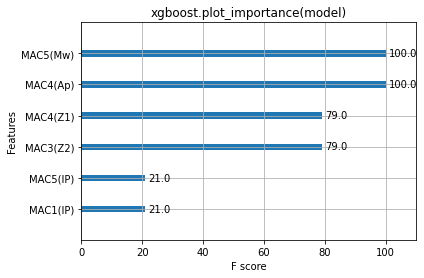

In [29]:
import shap
import xgboost
import matplotlib.pylab as pl
model = xgboost.train({"learning_rate": 0.01}, xgboost.DMatrix(X, label=y), 100)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
xgboost.plot_importance(model)
pl.title("xgboost.plot_importance(model)")
pl.show()

In [30]:
X_shap = X[['MAC5(Mw)', 'MAC4(Ap)', 'MAC4(Z1)', 'MAC3(Z2)', 'MAC5(IP)', 'MAC1(IP)']]
X_train,X_test,y_train,y_test=train_test_split(X_shap,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
shap_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.92
Precision: 0.8888888888888888
Recall: 0.8888888888888888


### 10. Boruta

In [31]:
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=6)
boru_selector = BorutaPy(rf, n_estimators='auto', verbose=0, random_state=1)
boru_selector.fit(X.values, y.values)

BorutaPy(estimator=RandomForestClassifier(class_weight='balanced', max_depth=6,
                                          n_estimators=149, n_jobs=-1,
                                          random_state=RandomState(MT19937) at 0x7FA22D2BD540),
         n_estimators='auto',
         random_state=RandomState(MT19937) at 0x7FA22D2BD540)

In [32]:
accept = X.columns[boru_selector.support_].to_list()
#accept

In [33]:
X_boruta = X[accept]
X_train,X_test,y_train,y_test=train_test_split(X_boruta,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
boruta_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.84
Precision: 0.7777777777777778
Recall: 0.7777777777777778


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


### 11. Embedded Random Forest

In [34]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), max_features=6)
embeded_rf_selector.fit(X, y)
embeded_rf_feature = getFeature(embeded_rf_selector.get_support())
embeded_rf_feature

['MAC3(Ap)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC6(Ap)', 'MAC7(At)']

In [35]:
X_rf = X[embeded_rf_feature]
X_train,X_test,y_train,y_test=train_test_split(X_rf,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
rf_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 0.75
Recall: 0.6666666666666666


### 12. Embedded LightGBM

In [36]:
from lightgbm import LGBMClassifier
from sklearn.feature_selection import SelectFromModel
lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05,
                    num_leaves=32, colsample_bytree=0.2,                                           
                    reg_alpha=3, reg_lambda=1, min_split_gain=0.01,    
                    min_child_weight=40)
embeded_lgb_selector = SelectFromModel(lgbc, max_features=6)
embeded_lgb_selector.fit(X, y)
embeded_lgb_feature = getFeature(embeded_lgb_selector.get_support())
embeded_lgb_feature

['MAC1(Mw)', 'MAC1(HP)', 'MAC1(IP)', 'MAC1(ECI)', 'MAC1(Vm)', 'MAC1(Anp)']

In [37]:
X_lgbm = X[embeded_lgb_feature]
X_train,X_test,y_train,y_test=train_test_split(X_lgbm,y,test_size=0.25,random_state=0)
y_pred = myModel(X_train,y_train,X_test)
lgbm_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.72
Precision: 0.625
Recall: 0.5555555555555556


In [38]:
chi_table = ['Chi-square', chi_acc, 'MAC3(Ap)', 'MAC4(ECI)', 'MAC4(Ap)', 'MAC5(Ap)', 'MAC6(Ap)', 'MAC7(Ap)' ]
mi_table = ['Mutual Information', mi_acc, 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC5(Ap)', 'MAC6(Mw)', 'MAC6(Ap)']
anova_table = ['Anova F-value', anova_acc, 'MAC4(IP)', 'MAC4(Ap)', 'MAC5(IP)', 'MAC5(At)', 'MAC5(Ap)', 'MAC7(Ap)']
var_table = ['Variance Threshold',thresh_acc,'-','-','-','-','-','-']
fisher_table = ['Fisher Score', fisher_acc, 'MAC4(ECI)', 'MAC3(Pa)', 'MAC3(ECI)', 'MAC3(Vm)', 'MAC1(ECI)','MAC4(Pa)']
multi_table = ['MultiSURF',multi_acc,'-','-','-','-','-','-']
rec_table = ['Recursive Feature Elimination',rec_acc, 'MAC3(IP)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(IP)', 'MAC5(Ap)', 'MAC7(At)']
perm_table = ['Permutation Importance',perm_acc,'MAC3(At)', 'MAC3(Ap)', 'MAC4(Ap)', 'MAC5(At)', 'MAC7(Mw)', 'MAC7(Vm)']
shap_table = ['SHAP', shap_acc, 'MAC5(Mw)', 'MAC4(Ap)', 'MAC4(Z1)', 'MAC3(Z2)', 'MAC5(IP)', 'MAC1(IP)']
boruta_table = ['Boruta',boruta_acc,'-','-','-','-','-','-']
rf_table = ['Embedded Random Forest', rf_acc,'MAC3(Ap)', 'MAC4(Ap)', 'MAC5(Mw)', 'MAC5(At)', 'MAC6(Ap)', 'MAC7(At)']
lgbm_table =['Embedded LightGBM', lgbm_acc, 'MAC1(Mw)', 'MAC1(HP)', 'MAC1(IP)', 'MAC1(ECI)', 'MAC1(Vm)', 'MAC1(Anp)']




NameError: name 'perm_acc' is not defined

In [35]:
myTable = [chi_table, mi_table, anova_table,var_table, fisher_table, multi_table, rec_table, perm_table, shap_table,
          boruta_table, rf_table, lgbm_table]




In [36]:
results = pd.DataFrame(myTable,columns=['Method', 'Accuracy','Feature 1','Feature 2','Feature 3','Feature 4','Feature 5','Feature 6'])

results                    

,Method,Accuracy,Feature 1,Feature 2,Feature 3,Feature 4,Feature 5,Feature 6
0,Chi-square,0.88,MAC3(Ap),MAC4(ECI),MAC4(Ap),MAC5(Ap),MAC6(Ap),MAC7(Ap)
1,Mutual Information,0.76,MAC4(Ap),MAC5(Mw),MAC5(At),MAC5(Ap),MAC6(Mw),MAC6(Ap)
2,Anova F-value,0.80,MAC4(IP),MAC4(Ap),MAC5(IP),MAC5(At),MAC5(Ap),MAC7(Ap)
3,Variance Threshold,0.72,-,-,-,-,-,-
4,Fisher Score,0.64,MAC4(ECI),MAC3(Pa),MAC3(ECI),MAC3(Vm),MAC1(ECI),MAC4(Pa)
5,MultiSURF,0.72,-,-,-,-,-,-
6,Recursive Feature Elimination,0.92,MAC3(IP),MAC4(Ap),MAC5(Mw),MAC5(IP),MAC5(Ap),MAC7(At)
7,Permutation Importance,0.84,MAC3(At),MAC3(Ap),MAC4(Ap),MAC5(At),MAC7(Mw),MAC7(Vm)
8,SHAP,0.92,MAC5(Mw),MAC4(Ap),MAC4(Z1),MAC3(Z2),MAC5(IP),MAC1(IP)
9,Boruta,0.88,-,-,-,-,-,-


In [26]:
results.to_csv('result.csv')

In [27]:
results.to_excel("result.xlsx", sheet_name='Sheet_name_1') 

In [15]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
diabetes = load_diabetes()
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.25,random_state=0)

model = Ridge(alpha=1e-2).fit(X_train, y_train)
model.score(X_val, y_val)

-7.3755193267135635

In [16]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

    # fit the model with data
logreg.fit(X_train,y_train)

    # get predict
y_pred=logreg.predict(X_val)
pp_im = metrics.accuracy_score(y_val, y_pred)
print("Accuracy:",metrics.accuracy_score(y_val, y_pred))

Accuracy: 0.72


C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
from sklearn.inspection import permutation_importance
r = permutation_importance(model, X_val, y_val,
                            n_repeats=30,
                            random_state=0)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(f"{data.columns[i]:<8}"
               f"{r.importances_mean[i]:.3f}"
               f" +/- {r.importances_std[i]:.3f}")


MAC7(Z1)1165.723 +/- 206.355
MAC2(Z1)619.053 +/- 125.856
MAC7(Mw)445.093 +/- 78.788
MAC3(Z1)325.653 +/- 65.469
MAC1(Mw)325.040 +/- 68.574
MAC5(Mw)301.063 +/- 54.619
MAC2(Mw)288.199 +/- 53.579
MAC4(Z1)218.922 +/- 42.216
MAC6(Z1)200.863 +/- 33.593
MAC6(HP)147.973 +/- 29.946
MAC3(Ap)146.277 +/- 31.166
MAC3(HP)138.040 +/- 28.945
MAC2(HP)134.440 +/- 25.928
MAC4(HP)120.941 +/- 26.972
MAC2(Anp)68.624 +/- 15.016
MAC1(Z1)64.465 +/- 14.540
ID      42.625 +/- 9.762
MAC6(Ap)41.045 +/- 8.018
MAC2(Pb)35.842 +/- 8.133
MAC1(Ap)32.609 +/- 7.728
MAC5(Ap)32.016 +/- 7.120
MAC5(HP)29.192 +/- 7.033
MAC1(Pb)26.298 +/- 5.917
MAC3(Z2)25.562 +/- 7.107
MAC3(Pb)24.707 +/- 5.793
MAC3(Mw)23.074 +/- 5.522
MAC4(Anp)21.567 +/- 5.498
MAC4(Mw)20.694 +/- 4.832
MAC5(Pb)16.975 +/- 4.504
MAC6(Anp)15.981 +/- 4.661
MAC4(Z2)11.866 +/- 3.682
MAC5(Z1)11.369 +/- 3.312
MAC4(Ap)10.522 +/- 2.862
MAC1(Anp)7.779 +/- 2.848
MAC7(HP)6.746 +/- 2.626
MAC5(Z2)4.108 +/- 1.423
MAC3(IP)3.876 +/- 1.552
MAC2(Z2)2.550 +/- 0.830
MAC7(Z2)2.537 +/- 

In [18]:
X_perm1 = X[['MAC7(Z1)','MAC2(Z1)', 'MAC7(Mw)', 'MAC3(Z1)', 'MAC1(Mw)', 'MAC5(Mw)']]
X_train,X_test,y_train,y_test=train_test_split(X_perm1,y,test_size=0.25,random_state=0)
logreg = LogisticRegression()

    # fit the model with data
logreg.fit(X_train,y_train)

    # get predict
y_pred=logreg.predict(X_test)
perm_acc = metrics.accuracy_score(y_test, y_pred)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.64
Precision: 0.5
Recall: 0.3333333333333333
